In [1]:
import numpy as np
import networkx as nx
import pandas as pd
import matplotlib.pyplot as plt
from helper import *
import geopandas as gpd

In [2]:
trades_df2016, trades_df2011, trades_df2006, trades_df2001, trades_Total, gasTrades_Total, coalTrades_Total, oilTrades_Total = get_data()

Highest centrality:     ISO3  Centrality
7   NLD    0.180301
9   USA    0.146477
18  BEL    0.146052
25  FRA    0.143496
12  ARE    0.133233


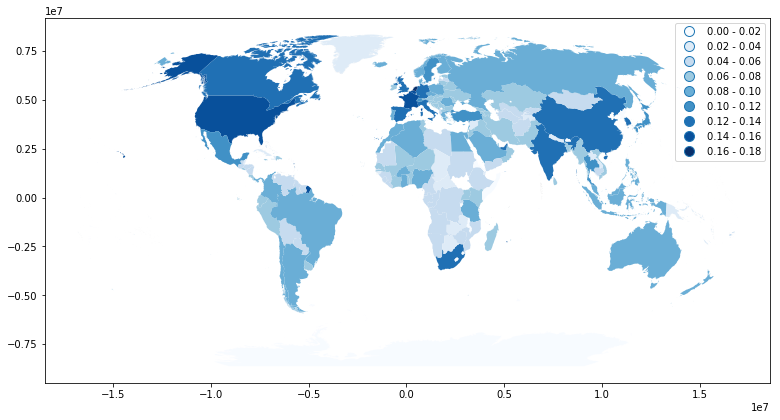

In [3]:
def plot_centrality(centrality_dict):
    shapefile = 'ne_10m_admin_0_countries/ne_10m_admin_0_countries.shp'
    gdf = gpd.read_file(shapefile)[['ADM0_A3', 'geometry']].to_crs('+proj=robin')

    centrality_df = pd.DataFrame.from_dict(centrality_dict, orient='index').reset_index()
    centrality_df.columns = ['ISO3', 'Centrality']
   
    max_row = centrality_df.loc[centrality_df.Centrality.idxmax()]
    print('Highest centrality: ',  centrality_df.sort_values('Centrality', ascending=False).head())
    merged = gdf.merge(centrality_df, left_on='ADM0_A3', right_on='ISO3')
    ax = merged.dropna().plot(column='Centrality', cmap='Blues', figsize= (13, 10), k=9, scheme='equal_interval', legend=True)
    plt.show()
    plt.close()


plot_centrality(nx.eigenvector_centrality(genGraph4Year(oilTrades_Total, 2016)[1]))

In [3]:
from matplotlib import pyplot
year = 2016
graphs_2016 = {'oil':genGraph4Year(oilTrades_Total, year)[1], 'gas':genGraph4Year(gasTrades_Total, year)[1], 'coal':genGraph4Year(coalTrades_Total, year)[1]}
year = 2000
graphs_2000 = {'oil':genGraph4Year(oilTrades_Total, year)[1], 'gas':genGraph4Year(gasTrades_Total, year)[1], 'coal':genGraph4Year(coalTrades_Total, year)[1]}

fuel_types = ['oil', 'gas', 'coal']
centralities_2016 = {i:nx.eigenvector_centrality(graphs_2016[i]) for i in fuel_types}
centralities_2000 = {i:nx.eigenvector_centrality(graphs_2000[i]) for i in fuel_types}

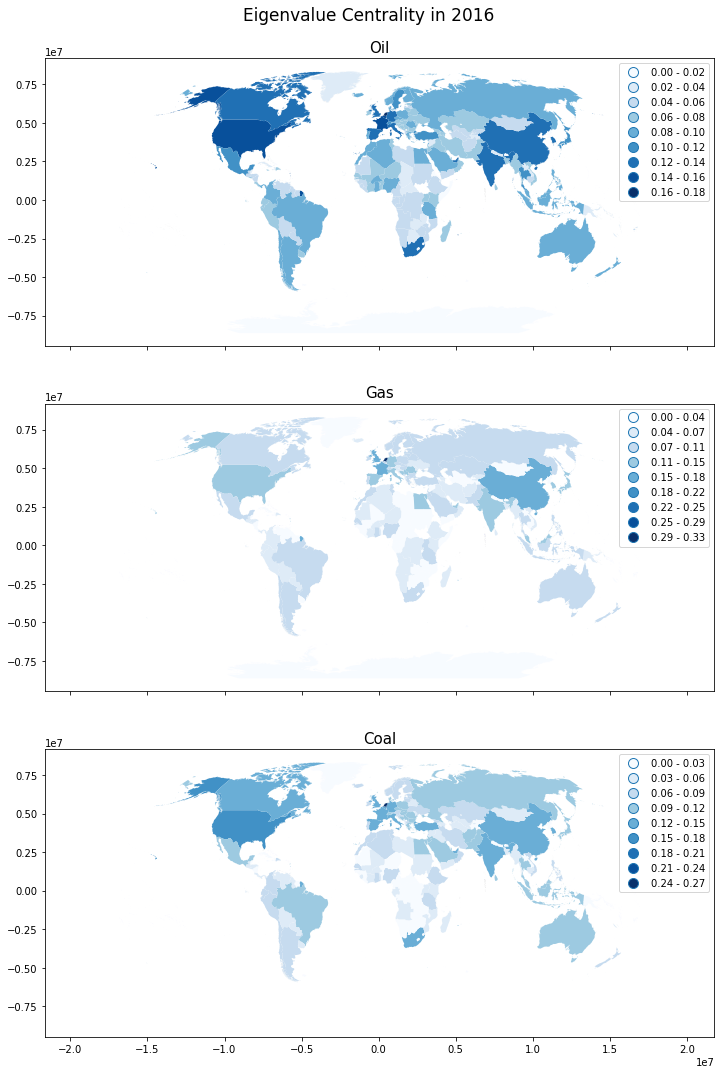

In [38]:
list_of_centralities_2016 = [centralities_2016[i] for i in fuel_types]
fig, (ax1, ax2, ax3) = pyplot.subplots(nrows=3, figsize=(12, 18), sharex=True, sharey=True)
axes = [ax1, ax2, ax3]

for i in range(3):
    shapefile = 'ne_10m_admin_0_countries/ne_10m_admin_0_countries.shp'
    gdf = gpd.read_file(shapefile)[['ADM0_A3', 'geometry']].to_crs('+proj=robin')

    centrality_df = pd.DataFrame.from_dict(list_of_centralities_2016[i], orient='index').reset_index()
    centrality_df.columns = ['ISO3', 'Centrality']

    merged = gdf.merge(centrality_df, left_on='ADM0_A3', right_on='ISO3')
    merged.dropna().plot(ax=axes[i], column='Centrality', cmap='Blues', figsize= (13, 10), k=9, scheme='equal_interval', legend=True)


ax1.set_title("Oil", fontsize=15)
ax2.set_title("Gas", fontsize = 15)
ax3.set_title("Coal", fontsize = 15)

fig.suptitle("Eigenvalue Centrality in 2016", fontsize = 17, y = 0.92)
plt.savefig('/Users/ozaltun/Dropbox (MIT)/18.0651/finalproject/eig_cent_2016.png')

plt.show()
plt.close()


In [4]:
list_of_centralities_2000 = [centralities_2000[i] for i in fuel_types]
fig, (ax1, ax2, ax3) = pyplot.subplots(nrows=3, figsize=(12, 18), sharex=True, sharey=True)
axes = [ax1, ax2, ax3]

for i in range(3):
    shapefile = 'ne_10m_admin_0_countries/ne_10m_admin_0_countries.shp'
    gdf = gpd.read_file(shapefile)[['ADM0_A3', 'geometry']].to_crs('+proj=robin')

    centrality_df = pd.DataFrame.from_dict(list_of_centralities_2000[i], orient='index').reset_index()
    centrality_df.columns = ['ISO3', 'Centrality']
    print('Highest centrality: ',  centrality_df.sort_values('Centrality', ascending=False).head())
 
    merged = gdf.merge(centrality_df, left_on='ADM0_A3', right_on='ISO3')
    merged.dropna().plot(ax=axes[i], column='Centrality', cmap='Blues', figsize= (13, 10), k=9, scheme='equal_interval', legend=True)

ax1.set_title("Oil", fontsize=15)
ax2.set_title("Gas", fontsize = 15)
ax3.set_title("Coal", fontsize = 15)

fig.suptitle("Eigenvalue Centrality in 2000", fontsize = 17, y = 0.92)
plt.savefig('/Users/ozaltun/Dropbox (MIT)/18.0651/finalproject/eig_cent_2000.png')
plt.show()
plt.close()

Highest centrality:     ISO3  Centrality
13  USA    0.178016
4   FRA    0.168736
21  DEU    0.153873
23  ITA    0.151977
5   GBR    0.151408
Highest centrality:     ISO3  Centrality
4   USA    0.223859
9   FRA    0.209448
2   GBR    0.184177
41  NLD    0.174676
62  TUR    0.172928
Highest centrality:     ISO3  Centrality
4   DEU    0.192223
25  NLD    0.187602
48  FRA    0.180131
6   ITA    0.174054
2   USA    0.170956


FileNotFoundError: [Errno 2] No such file or directory: '/Users/ozaltun/Dropbox (MIT)/18.0651/finalproject/eig_cent_2000.png'